# Trabalho de Métodos Computacionais - Energia Sustentável

# Carga das Ferramentas

In [46]:
# Importando as bibliotecas
!pip install geopandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go

     ---------------------------------------- 1.1/1.1 MB 538.6 kB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 963.1 kB/s eta 0:00:00
     ---------------------------------------- 22.9/22.9 MB 2.1 MB/s eta 0:00:00


In [26]:
# Carregando o dataset
path_dataset = r'https://raw.githubusercontent.com/Felipefalex/Projeto-Sustainable-Energy/main/global-data-on-sustainable-energy%20(1).csv'
data = pd.read_csv(path_dataset)

# Exibindo as primeiras linhas do dataset para inspeção inicial
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


# Análise dos Dados

A primeira fase do projeo é a análise da estrutura dos dados: quais são as informações disponíveis, como estão elencadas e qual seu comportamento.

In [27]:
# Tamanho do dataset e tipos de dados de cada coluna
dataset_info = data.info()
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

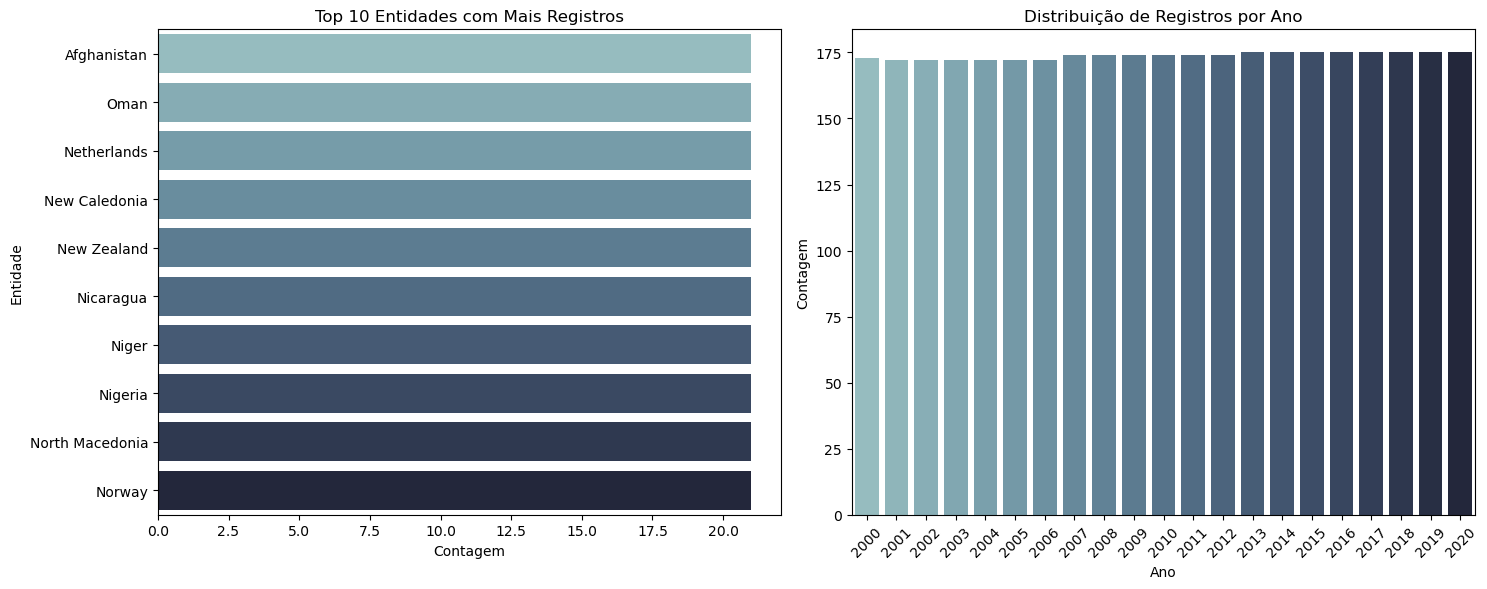

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2010.04,6.050000e+00,2000.00,2005.00,2010.00,2015.00,2.020000e+03
Access to electricity (% of population),3639.0,78.93,3.028000e+01,1.25,59.80,98.36,100.00,1.000000e+02
Access to clean fuels for cooking,3480.0,63.26,3.904000e+01,0.00,23.18,83.15,100.00,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,113.14,2.441700e+02,0.00,3.54,32.91,112.21,3.060190e+03
Financial flows to developing countries (US $),1560.0,94224000.00,2.981544e+08,0.00,260000.00,5665000.00,55347500.00,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,32.64,2.989000e+01,0.00,6.52,23.30,55.24,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,70.37,3.480500e+02,0.00,0.29,2.97,26.84,5.184130e+03
Electricity from nuclear (TWh),3523.0,13.45,7.301000e+01,0.00,0.00,0.00,0.00,8.094100e+02
Electricity from renewables (TWh),3628.0,23.97,1.044300e+02,0.00,0.04,1.47,9.60,2.184940e+03
Low-carbon electricity (% electricity),3607.0,36.80,3.431000e+01,0.00,2.88,27.87,64.40,1.000000e+02


In [28]:
# Estatísticas descritivas das variáveis numéricas
estatistica_numericas = data.describe().round(2).T

# Visualização da distribuição das principais variáveis categóricas
# Países com maiores números de registros
cores_paises = sns.cubehelix_palette(10, rot=-.25, light=.7)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(y=data['Entity'], order=data['Entity'].value_counts().index[:10], palette=cores_paises)
plt.title('Top 10 Entidades com Mais Registros')
plt.ylabel('Entidade')
plt.xlabel('Contagem')

# Distribuição de registros por ano
cores_anos = sns.cubehelix_palette(21, rot=-.25, light=.7)
plt.subplot(1, 2, 2)
sns.countplot(x=data['Year'], palette=cores_anos)
plt.title('Distribuição de Registros por Ano')
plt.ylabel('Contagem')
plt.xlabel('Ano')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

numerical_stats

**Ano**: Os dados abrangem de 2000 a 2020. A distribuição de registros por ano é bastante uniforme, indicando que a maioria dos anos tem uma quantidade similar de dados.<br>
**Acesso à Eletricidade**: Em média, 78.93% da população tinha acesso à eletricidade, com uma variação considerável (desvio padrão de 30.28%).<br>
**Acesso a Combustíveis Limpos para Cozinhar**: Média de 63.26% com alta variação (desvio padrão de 39.04%).<br>
**Capacidade de Geração de Eletricidade Renovável Per Capita**: Média de 113.14, mas com grande variação (desvio padrão de 244.17), indicando diferenças significativas entre países.<br>
**Fluxos Financeiros para Países em Desenvolvimento**: Média alta com um desvio padrão muito grande, sugerindo uma distribuição bastante desigual desses fluxos.<br>
**Consumo de Energia Primária Per Capita**: Os dados variam significativamente entre os países.<br>
**Emissões de CO2**: Variação substancial nas emissões de CO2 entre os países.<br>
**Países**: O gráfico mostra as 10 entidades (países) com mais registros no dataset. Isso pode ser útil para entender quais países têm dados mais completos ou estão mais frequentemente representados.

In [29]:
# Tratamento de valores faltantes
# Substituindo valores faltantes por zeros em colunas financeiras e de energia
colunas_a_preencher = [
    'Financial flows to developing countries (US $)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)'
]

data[colunas_a_preencher] = data[colunas_a_preencher].fillna(0)

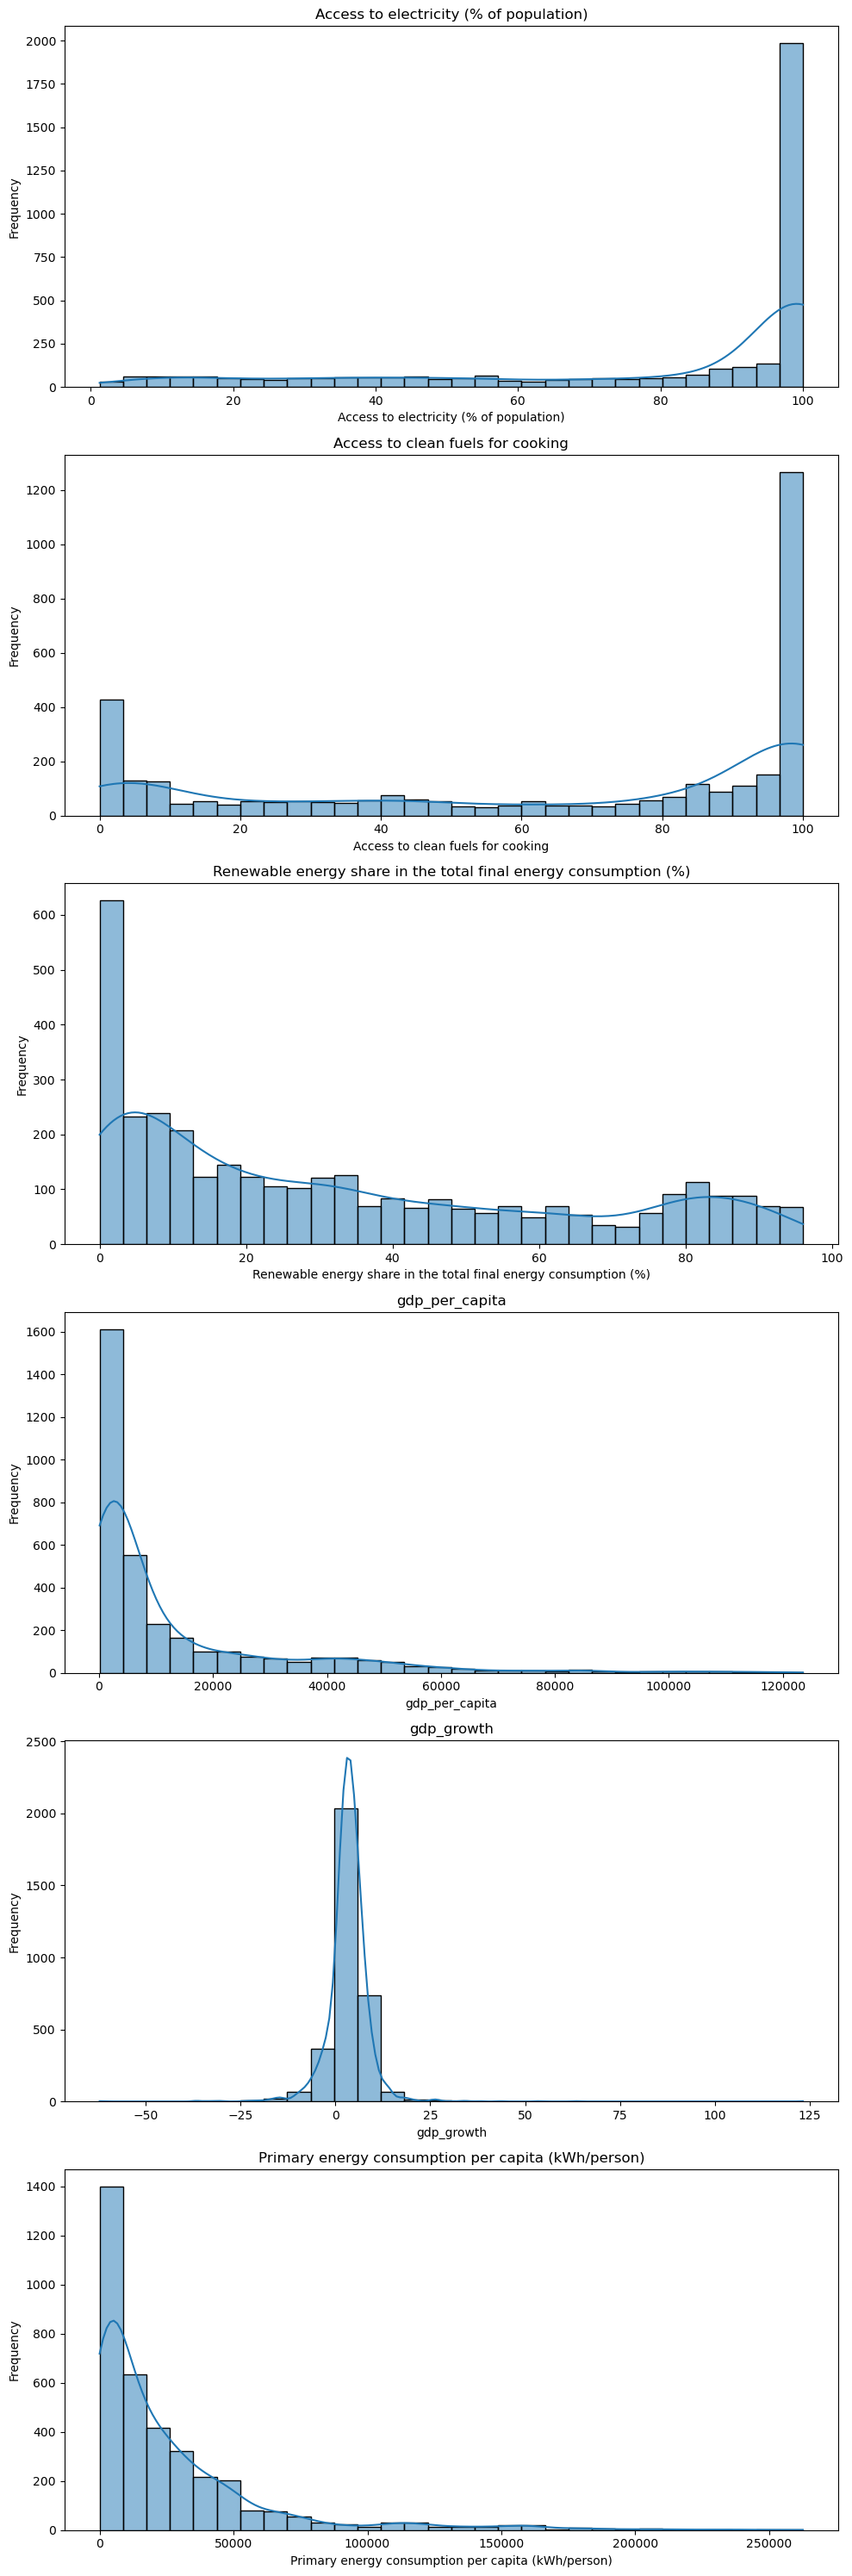

In [30]:
# Visualização Gráfica das Principais Variáveis
# Selecionando variáveis chave para visualização
variáveis_chave = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable energy share in the total final energy consumption (%)',
    'gdp_per_capita',
    'gdp_growth',
    'Primary energy consumption per capita (kWh/person)'
]

# Criando gráficos para cada variável selecionada
fig, axes = plt.subplots(len(variáveis_chave), 1, figsize=(10, 5 * len(variáveis_chave)))

for i, col in enumerate(variáveis_chave):
    sns.histplot(data[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

A maioria das variáveis exibe uma distribuição assimétrica, indicando uma concentração de valores.<br>
As distribuições mostram uma grande variação entre países em termos de acesso à eletricidade, uso de combustíveis limpos e energia renovável.<br>

C:\Users\felip\AppData\Local\Temp\ipykernel_24284\3096646238.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



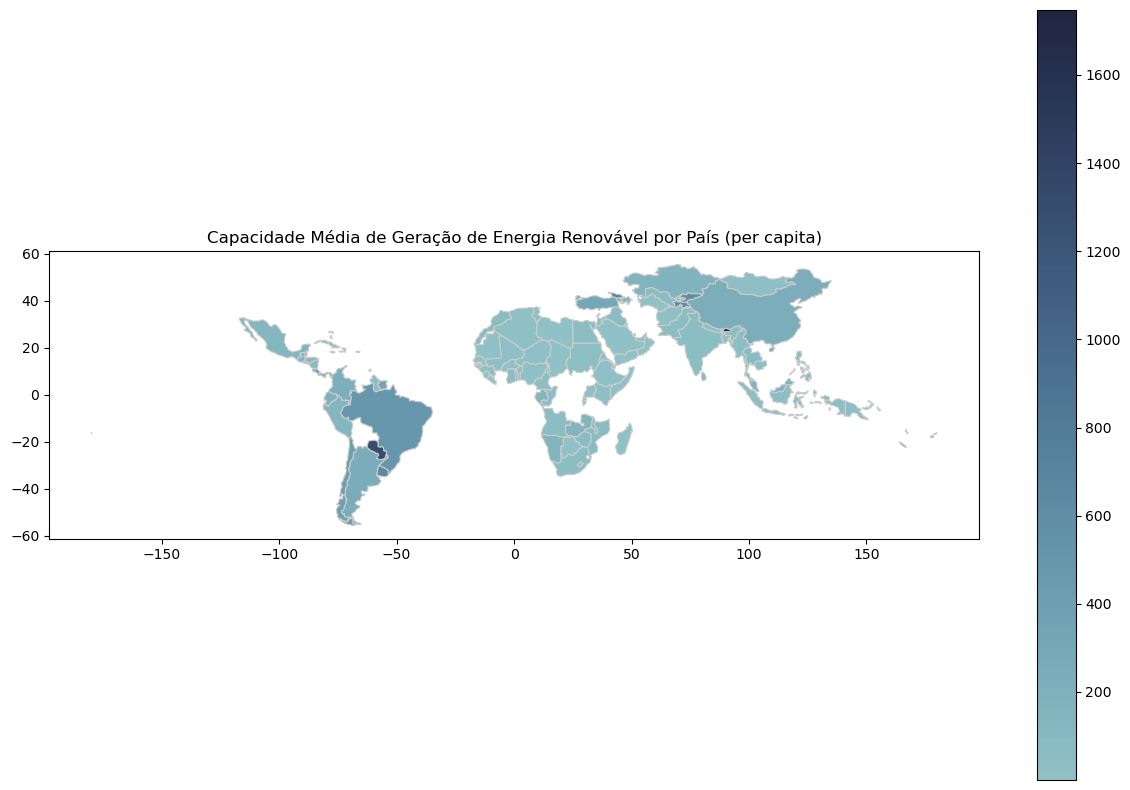

In [65]:
# Carregando um mapa mundial
mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Calculando a média da capacidade de geração de energia renovável per capita por país
media_capacidade_energia_per_capta = data.groupby('Entity')['Renewable-electricity-generating-capacity-per-capita'].mean()

# Mesclando o dataset de capacidade de energia renovável com o mapa mundial
energia_renovavel_mundial = mundo.set_index('name').join(media_capacidade_energia_per_capta)

# Definindo a paleta de cores
cores_mapa = sns.cubehelix_palette(rot=-.25, light=.7, as_cmap=True)

# Plotando o mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
energia_renovavel_mundial.plot(column='Renewable-electricity-generating-capacity-per-capita',
                            cmap=cores_mapa,
                            linewidth=0.8,
                            ax=ax,
                            edgecolor='0.8',
                            legend=True)
ax.set_title('Capacidade Média de Geração de Energia Renovável por País (per capita)')
plt.show()


In [ ]:
# 